In [2]:
%load_ext autoreload
%autoreload 2

# IMPORTS & LOADING DATA

In [ ]:
from utils.analysis import *
import plotly.graph_objects as go
import numpy as np

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import pandas as pd

/Users/stephaniejolie/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephaniejolie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/stephaniejolie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephaniejolie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
china_df = pd.read_csv(str(Path.cwd().parent)+ '/data/China_df.csv')
hong_kong_df = pd.read_csv(str(Path.cwd().parent) + '/data/HongKong_df.csv')
taiwan_df = pd.read_csv(str(Path.cwd().parent) + '/data/taiwan_df.csv')


In [5]:
taiwan_df

,post_title,post_id,post_body,post_datetime,post_score
0,"Weekly Travel, Questions, & Mandarin Thread",1giq4io,This thread is for:\n\n* Travel queries & info...,1.730650e+09,1
1,Second Trump Presidency - What would this mean...,1gktc5y,Share your thoughts now that Trump has won.,1.730880e+09,270
2,Taiwanese dating culture/ pitfalls to avoid?,1gl07yl,I met this Taiwanese lady at the gym and I've ...,1.730905e+09,31
3,Day trip to Taichung - “Sun Cake”,1gl67fn,Took a day trip to Taichung. What a beautiful ...,1.730920e+09,3
4,My experience going through obtaining a driver...,1gktary,I didn't have a driver's license before Taiwan...,1.730879e+09,24
...,...,...,...,...,...
167,What is the sticker from PX mart for?,1gfh7n0,When I bought some groceries in PX Mart they w...,1.730274e+09,14
168,Scooter Taxis in Taiwan,1gfj76v,"I just came back from Taiwan, and I saw a lot ...",1.730284e+09,9
169,Taipei and thinking of another city …,1gfhqeg,I’ve been to Taipei a few times and my husband...,1.730277e+09,6
170,Where is the money coming from?,1geuti7,I’ve been living in Tainan for the past month ...,1.730209e+09,127


In [6]:
hong_kong_df

,post_title,post_id,post_body,post_datetime,post_score
0,"Information needed on CityU, HKUST and CUHK",1gl6t35,Im a second year dutch student who is planning...,1.730921e+09,1
1,What city or cities has now the vibe HK had in...,1gl6qzt,**About 3 weeks ago I posted this:**\n\n \n\n[...,1.730921e+09,1
2,Guitar looking for Bass and Drums,1gl5xp6,"Hi all, \n\n \n**Brief self background**\n\n>...",1.730919e+09,1
3,What is the best sushi in Hong Kong?,1gl4gdt,I’d love recs for good sushi restaurants in HK...,1.730915e+09,0
4,As LGBTQ is Hong Kong a good place to move to?,1gl2rs3,"I'm familiar with some of the clubs, petticoat...",1.730911e+09,0
...,...,...,...,...,...
72,Smoking in Hong Kong,1ghsee1,I've moved back to Hong Kong recently and ther...,1.730538e+09,0
73,Are there stores that sell AER Backpacks?,1ghsd3v,Hi! Would like to know if there are AER stores...,1.730538e+09,0
74,Payment and Reloading,1ghsb3t,I am from the UK and plan to be in HK for 3 we...,1.730538e+09,1
75,Do Hong Kong Credit Cards Usually Offer Annual...,1ghrfrt,Relocating to HK soon and in search for a good...,1.730534e+09,1


# GENERAL ANALYSIS

In [ ]:
def do_general_analysis(subreddit,df):
    tfidf_results = tfidf_analyze_subreddit_df(df)
    tf_idf_scores = get_mean_tfidf(
        tfidf_matrix=tfidf_results['tfidf_matrix'],
        feature_names=tfidf_results['feature_names'],
        return_df=True
    )

    top_terms = get_top_terms(tf_idf_scores, n_terms=300)

    top_terms_df = pd.DataFrame(top_terms)
    top_terms_df.to_csv(f"/data/{subreddit}_top_terms.csv", index=False)

    print(f"The top terms are:\n", "\n".join(top_terms), sep="")
    display(tf_idf_scores.head(100).style.format("{:.3f}"))

    #only top 10 terms
    top_terms_sel = top_terms[:10]
    fig, ax = plot_word_timeseries_df(df, top_terms_sel)
    #plt.savefig('test.png')
    plt.show()

    if subreddit.lower() in top_terms:
        top_terms.remove(subreddit.lower())
        del top_terms[10]

    if subreddit.lower() == top_terms[0] + top_terms[1]:
        top_terms = top_terms[2:]

    print(f"The top terms for {subreddit} not including subreddit names are:\n", "\n".join(top_terms), sep="")
    display(tf_idf_scores.head().style.format("{:.3f}"))
    fig, ax = plot_word_timeseries_df(df, top_terms[:10])
    #plt.savefig('test.png')
    plt.show()

    return tf_idf_scores, tfidf_results


The top terms are:
china
chinese
like
year
know
would
shanghai
anyone
make
want
time
get
people
travel
find
beijing
use
good
one
city
trump
day
student
national
say
first
trip
taiwan
give
halloween
also
market
plan
visa
take
visit
buy
could
see
work
card
respond
free
suggest
look
place
car
need
around
help
guangzhou
pay
hello
online
back
language
university
website
try
country
much
phone
live
culture
thing
thanks
number
old
company
guy
think
brand
friend
history
run
ticket
bank
ccp
japanese
bring
question
province
life
manufacturer
tip
cut
government
drive
family
mean
military
access
name
feel
shenzhen
dynasty
ask
week
app
food
many
since
way
world
store
something
create
main
read
account
child
american
actually
come
might
please
song
cost
maybe
citizen
empty
wonder
school
return
international
link
different
call
state
tsmc
police
member
fly
purchase
part
start
check
biden
bad
lot
still
everyone
video
gift
best
man
cultural
next
hotel
entry
tell
line
even
photo
local
costume
great
comm

,score
term,
china,0.092
chinese,0.061
like,0.031
year,0.024
know,0.024
would,0.023
shanghai,0.023
anyone,0.021
make,0.021


0      China responds to Trump's victory, wants 'win-...
1                 Trump Presidency Predictions for China
2         China's markets drop as Trump presidency looms
3      Huawei reportedly tapping TSMC engineers with ...
4      China is building new villages on its remote H...
                             ...                        
177             Which sim card to get for my China trip?
178    How to respond to "you can criticize gov but i...
179    How To Find Cowriters Who Know A Lot About Chi...
180                       Using WISE Debit Card in China
181    I would like to know the name of the live broa...
Name: post_title, Length: 182, dtype: object
0                                                       
1      Now that Trump has won the presidency, here ar...
2                                                       
3                                                       
4                                                       
                             ...           

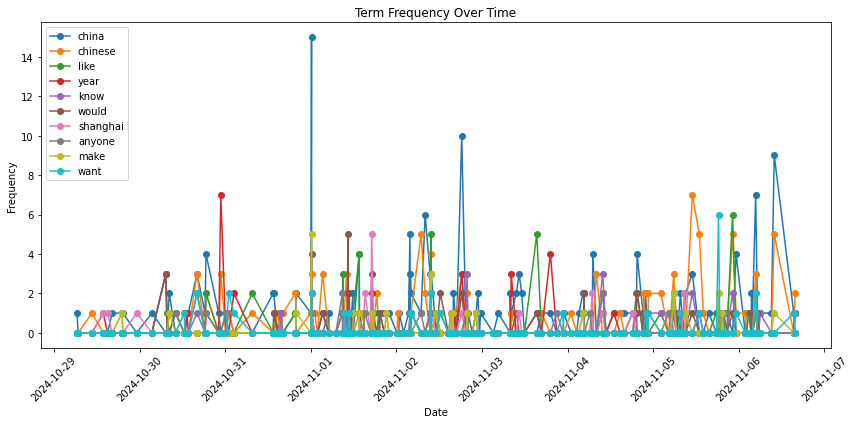

The top terms for china not including subreddit names are:
chinese
like
year
know
would
shanghai
anyone
make
want
time
people
travel
find
beijing
use
good
one
city
trump
day
student
national
say
first
trip
taiwan
give
halloween
also
market
plan
visa
take
visit
buy
could
see
work
card
respond
free
suggest
look
place
car
need
around
help
guangzhou
pay
hello
online
back
language
university
website
try
country
much
phone
live
culture
thing
thanks
number
old
company
guy
think
brand
friend
history
run
ticket
bank
ccp
japanese
bring
question
province
life
manufacturer
tip
cut
government
drive
family
mean
military
access
name
feel
shenzhen
dynasty
ask
week
app
food
many
since
way
world
store
something
create
main
read
account
child
american
actually
come
might
please
song
cost
maybe
citizen
empty
wonder
school
return
international
link
different
call
state
tsmc
police
member
fly
purchase
part
start
check
biden
bad
lot
still
everyone
video
gift
best
man
cultural
next
hotel
entry
tell
line
even


,score
term,
china,0.092
chinese,0.061
like,0.031
year,0.024
know,0.024


0      China responds to Trump's victory, wants 'win-...
1                 Trump Presidency Predictions for China
2         China's markets drop as Trump presidency looms
3      Huawei reportedly tapping TSMC engineers with ...
4      China is building new villages on its remote H...
                             ...                        
177             Which sim card to get for my China trip?
178    How to respond to "you can criticize gov but i...
179    How To Find Cowriters Who Know A Lot About Chi...
180                       Using WISE Debit Card in China
181    I would like to know the name of the live broa...
Name: post_title, Length: 182, dtype: object
0                                                       
1      Now that Trump has won the presidency, here ar...
2                                                       
3                                                       
4                                                       
                             ...           

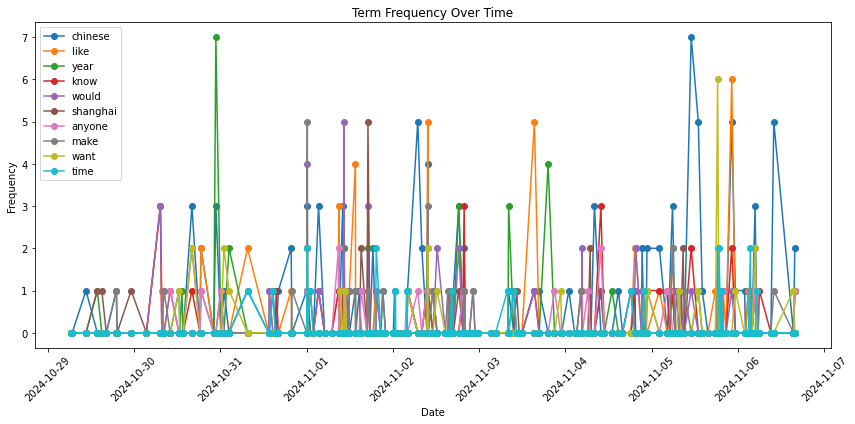

In [70]:
tf_idf_scores_china, tfidf_china = do_general_analysis('china',china_df)

The top terms are:
taiwan
taipei
get
know
like
anyone
want
would
taiwanese
look
find
thanks
people
one
day
see
work
think
typhoon
taichung
try
plan
year
hello
time
take
need
thank
wonder
help
travel
experience
say
question
buy
really
ask
also
since
use
visit
come
around
week
make
event
next
city
lot
friend
school
online
place
chinese
good
kid
night
mandarin
sell
english
everyone
much
ntd
tell
food
open
something
guy
could
stay
curious
month
apply
share
thing
appreciate
license
park
currently
send
different
pay
country
hike
live
mean
world
suggestion
still
feel
another
new
love
apartment
able
speak
airport
learn
trip
visa
service
money
someone
card
back
university
power
taxi
safe
leave
old
check
give
advance
china
company
language
information
station
please
two
even
type
call
already
big
store
saw
many
kaohsiung
available
mart
possible
sure
group
meet
shoe
right
stuff
etc
family
name
arrive
start
address
luggage
japan
set
issue
google
shop
little
agency
recommendation
hospital
worth
tal

,score
term,
taiwan,0.064
taipei,0.037
get,0.033
know,0.031
like,0.030
anyone,0.029
want,0.028
would,0.026
taiwanese,0.026


0            Weekly Travel, Questions, & Mandarin Thread
1      Second Trump Presidency - What would this mean...
2           Taiwanese dating culture/ pitfalls to avoid?
3                      Day trip to Taichung - “Sun Cake”
4      My experience going through obtaining a driver...
                             ...                        
167                What is the sticker from PX mart for?
168                              Scooter Taxis in Taiwan
169               Taipei and thinking of another city … 
170                      Where is the money coming from?
171    Applying for Taiwan Passport and Household Reg...
Name: post_title, Length: 172, dtype: object
0      This thread is for:\n\n* Travel queries & info...
1            Share your thoughts now that Trump has won.
2      I met this Taiwanese lady at the gym and I've ...
3      Took a day trip to Taichung. What a beautiful ...
4      I didn't have a driver's license before Taiwan...
                             ...           

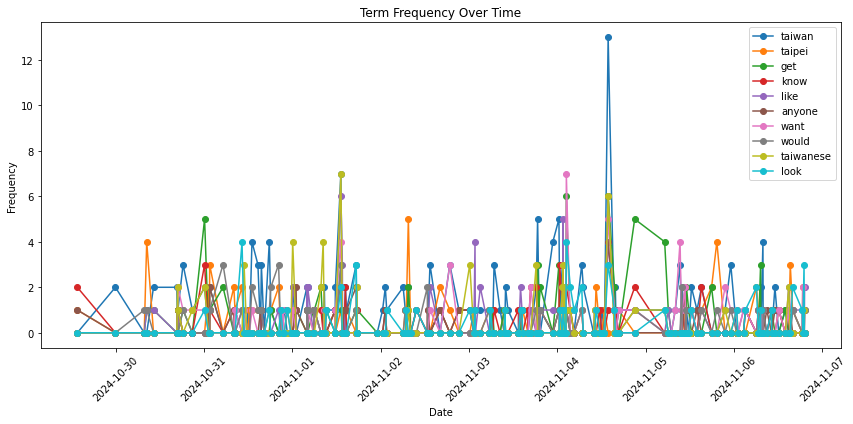

The top terms for taiwan not including subreddit names are:
taipei
get
know
like
anyone
want
would
taiwanese
look
find
people
one
day
see
work
think
typhoon
taichung
try
plan
year
hello
time
take
need
thank
wonder
help
travel
experience
say
question
buy
really
ask
also
since
use
visit
come
around
week
make
event
next
city
lot
friend
school
online
place
chinese
good
kid
night
mandarin
sell
english
everyone
much
ntd
tell
food
open
something
guy
could
stay
curious
month
apply
share
thing
appreciate
license
park
currently
send
different
pay
country
hike
live
mean
world
suggestion
still
feel
another
new
love
apartment
able
speak
airport
learn
trip
visa
service
money
someone
card
back
university
power
taxi
safe
leave
old
check
give
advance
china
company
language
information
station
please
two
even
type
call
already
big
store
saw
many
kaohsiung
available
mart
possible
sure
group
meet
shoe
right
stuff
etc
family
name
arrive
start
address
luggage
japan
set
issue
google
shop
little
agency
recomm

,score
term,
taiwan,0.064
taipei,0.037
get,0.033
know,0.031
like,0.030


0            Weekly Travel, Questions, & Mandarin Thread
1      Second Trump Presidency - What would this mean...
2           Taiwanese dating culture/ pitfalls to avoid?
3                      Day trip to Taichung - “Sun Cake”
4      My experience going through obtaining a driver...
                             ...                        
167                What is the sticker from PX mart for?
168                              Scooter Taxis in Taiwan
169               Taipei and thinking of another city … 
170                      Where is the money coming from?
171    Applying for Taiwan Passport and Household Reg...
Name: post_title, Length: 172, dtype: object
0      This thread is for:\n\n* Travel queries & info...
1            Share your thoughts now that Trump has won.
2      I met this Taiwanese lady at the gym and I've ...
3      Took a day trip to Taichung. What a beautiful ...
4      I didn't have a driver's license before Taiwan...
                             ...           

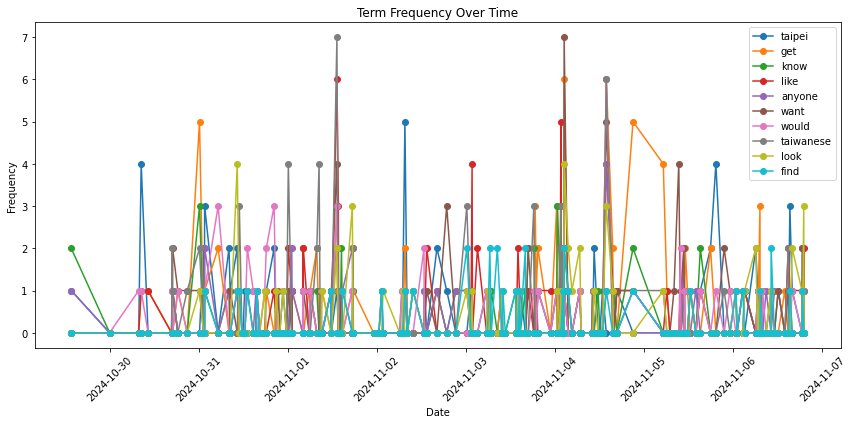

In [71]:
tf_idf_scores_taiwan,tfidf_taiwan = do_general_analysis('taiwan',taiwan_df)

The top terms are:
hong
kong
card
get
look
know
buy
good
like
would
want
need
place
find
use
time
think
people
store
one
octopus
year
question
help
travel
still
city
milk
appreciate
thanks
take
move
wonder
sneaker
next
many
may
back
miss
shop
thank
make
post
thing
work
market
recommendation
local
sure
around
old
kowloon
say
could
company
also
non
anyone
seem
visit
since
price
day
even
advice
really
put
sell
etc
best
everyone
leave
hongkong
option
experience
recommend
hard
family
laptop
ask
clean
something
iphone
come
restaurant
plan
building
try
exchange
january
credit
sign
without
possible
decent
side
love
express
helper
live
lot
offer
ive
pick
preferably
situation
anything
purchase
country
job
might
hotel
week
well
student
bag
chinese
red
already
new
long
speak
first
change
passport
person
small
hkers
birthday
house
heard
way
different
wear
advance
right
toy
head
nice
lee
order
street
guy
trip
cool
though
stuff
source
busy
crazy
two
towards
website
beach
money
please
send
talk
discus

,score
term,
hong,0.060
kong,0.059
card,0.045
get,0.043
look,0.041
know,0.037
buy,0.036
good,0.036
like,0.035


0           Information needed on CityU, HKUST and CUHK
1     What city or cities has now the vibe HK had in...
2                     Guitar looking for Bass and Drums
3                 What is the best sushi in Hong Kong? 
4        As LGBTQ is Hong Kong a good place to move to?
                            ...                        
72                                 Smoking in Hong Kong
73            Are there stores that sell AER Backpacks?
74                               Payment and Reloading 
75    Do Hong Kong Credit Cards Usually Offer Annual...
76    How strict is hk express with personal baggage...
Name: post_title, Length: 77, dtype: object
0     Im a second year dutch student who is planning...
1     **About 3 weeks ago I posted this:**\n\n \n\n[...
2     Hi all, \n\n  \n**Brief self background**\n\n>...
3     I’d love recs for good sushi restaurants in HK...
4     I'm familiar with some of the clubs, petticoat...
                            ...                        
72  

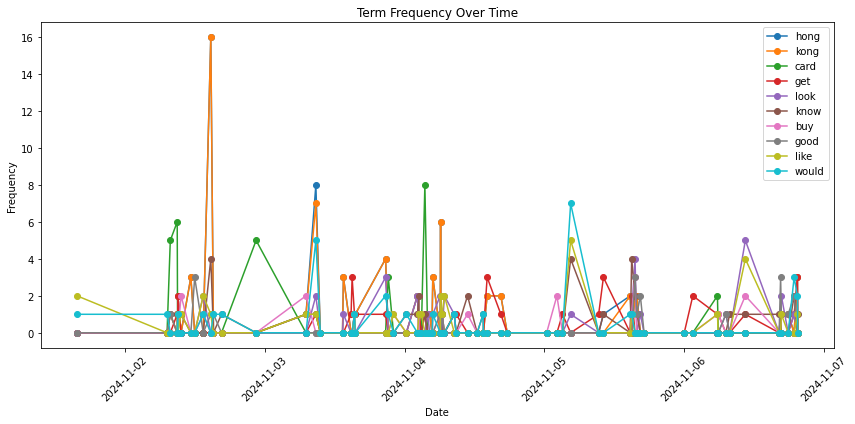

The top terms for hongkong not including subreddit names are:
card
get
look
know
buy
good
like
would
need
place
find
use
time
think
people
store
one
octopus
year
question
help
travel
still
city
milk
appreciate
thanks
take
move
wonder
sneaker
next
many
may
back
miss
shop
thank
make
post
thing
work
market
recommendation
local
sure
around
old
kowloon
say
could
company
also
non
anyone
seem
visit
since
price
day
even
advice
really
put
sell
etc
best
everyone
leave
option
experience
recommend
hard
family
laptop
ask
clean
something
iphone
come
restaurant
plan
building
try
exchange
january
credit
sign
without
possible
decent
side
love
express
helper
live
lot
offer
ive
pick
preferably
situation
anything
purchase
country
job
might
hotel
week
well
student
bag
chinese
red
already
new
long
speak
first
change
passport
person
small
hkers
birthday
house
heard
way
different
wear
advance
right
toy
head
nice
lee
order
street
guy
trip
cool
though
stuff
source
busy
crazy
two
towards
website
beach
money
plea

,score
term,
hong,0.060
kong,0.059
card,0.045
get,0.043
look,0.041


0           Information needed on CityU, HKUST and CUHK
1     What city or cities has now the vibe HK had in...
2                     Guitar looking for Bass and Drums
3                 What is the best sushi in Hong Kong? 
4        As LGBTQ is Hong Kong a good place to move to?
                            ...                        
72                                 Smoking in Hong Kong
73            Are there stores that sell AER Backpacks?
74                               Payment and Reloading 
75    Do Hong Kong Credit Cards Usually Offer Annual...
76    How strict is hk express with personal baggage...
Name: post_title, Length: 77, dtype: object
0     Im a second year dutch student who is planning...
1     **About 3 weeks ago I posted this:**\n\n \n\n[...
2     Hi all, \n\n  \n**Brief self background**\n\n>...
3     I’d love recs for good sushi restaurants in HK...
4     I'm familiar with some of the clubs, petticoat...
                            ...                        
72  

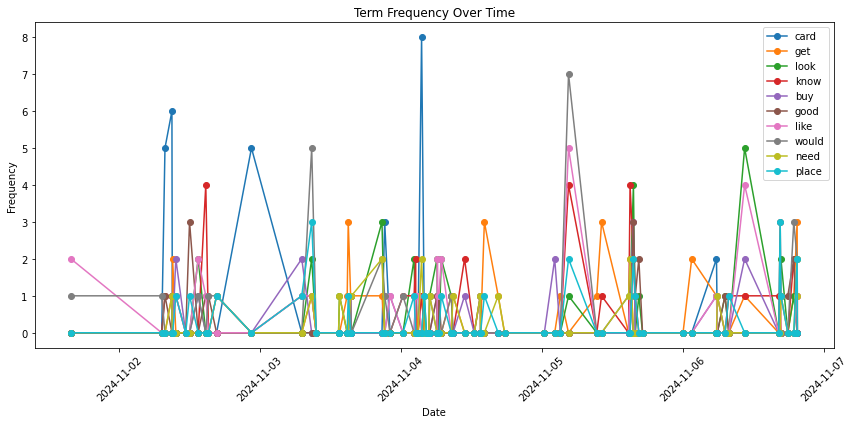

In [72]:
tf_idf_scores_hongkong, tfidf_hongkong = do_general_analysis('hongkong',hong_kong_df)

# PLOT TIME SERIES

## China

In [ ]:
#read csv
china_top_terms = pd.read_csv('/data/china_top_terms.csv',sep=",")
#rename columns
china_top_terms.columns = ['term','category']
china_top_terms_full = china_top_terms
#only keep category != O
china_top_terms = china_top_terms[china_top_terms['category'] != 'O']

In [245]:
china_top_terms.head(10)

,term,category
0,china,C
1,chinese,C
6,shanghai,P
13,travel,C
15,beijing,C
19,city,C
20,trump,P
23,national,C
26,trip,C
27,taiwan,P


0      China responds to Trump's victory, wants 'win-...
1                 Trump Presidency Predictions for China
2         China's markets drop as Trump presidency looms
3      Huawei reportedly tapping TSMC engineers with ...
4      China is building new villages on its remote H...
                             ...                        
177             Which sim card to get for my China trip?
178    How to respond to "you can criticize gov but i...
179    How To Find Cowriters Who Know A Lot About Chi...
180                       Using WISE Debit Card in China
181    I would like to know the name of the live broa...
Name: post_title, Length: 182, dtype: object
0                                                       
1      Now that Trump has won the presidency, here ar...
2                                                       
3                                                       
4                                                       
                             ...           

/Users/stephaniejolie/Library/CloudStorage/OneDrive-Nexus365/Michaelmas/Fundamentals of Social Data Science in Python (5)/Week2/oii-fsds-textanalysis/utils/analysis.py:335: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  


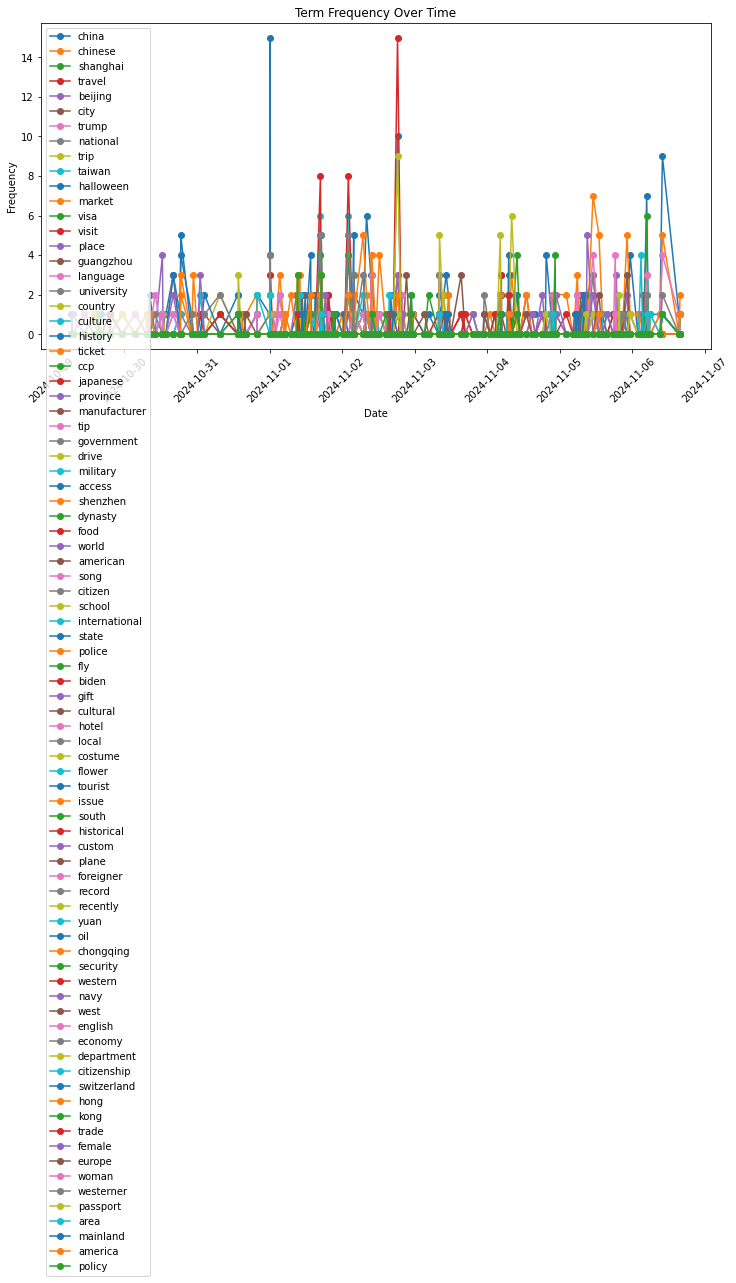

In [104]:
#convert df column to list
test = china_top_terms['term'].tolist()
fig, ax = plot_word_timeseries_df(china_df, test)
#plt.savefig('test.png')
plt.show()

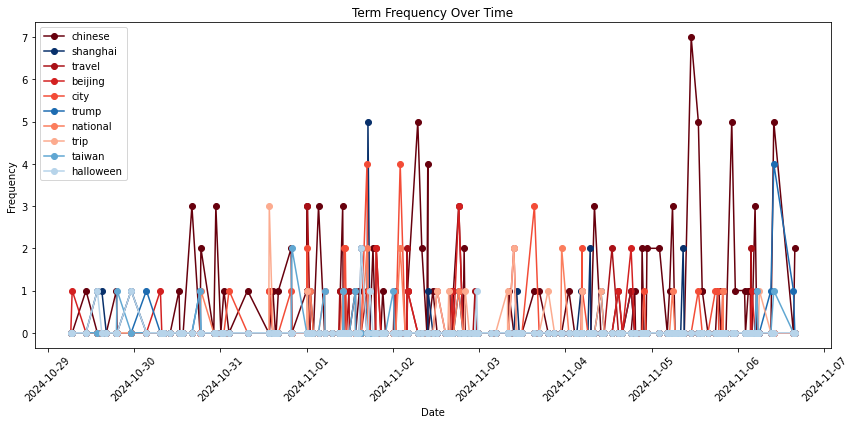

In [193]:
fig, ax = plot_word_timeseries_df_cat(china_df, china_top_terms[1:11])
#plt.savefig('test.png')
plt.show()

In [308]:
#F9A34E
plot_word_timeseries_df_cat_plotly_test(china_df, china_top_terms[1:11], 'China')

## Taiwan

In [ ]:
#read csv
taiwan_top_terms = pd.read_csv('/data/taiwan_top_terms.csv',sep=",")
#rename columns
taiwan_top_terms.columns = ['term','category']
#category column to uppercase
taiwan_top_terms['category'] = taiwan_top_terms['category'].str.upper()
taiwan_top_terms_full = taiwan_top_terms
#only keep category != O
taiwan_top_terms = taiwan_top_terms[taiwan_top_terms['category'] != 'O']

In [108]:
taiwan_top_terms.head(10)

,term,category
8,taiwanese,P
16,work,C
18,typhoon,C
19,taichung,C
21,plan,C
30,travel,C
31,experience,C
40,visit,C
45,event,C
47,city,C


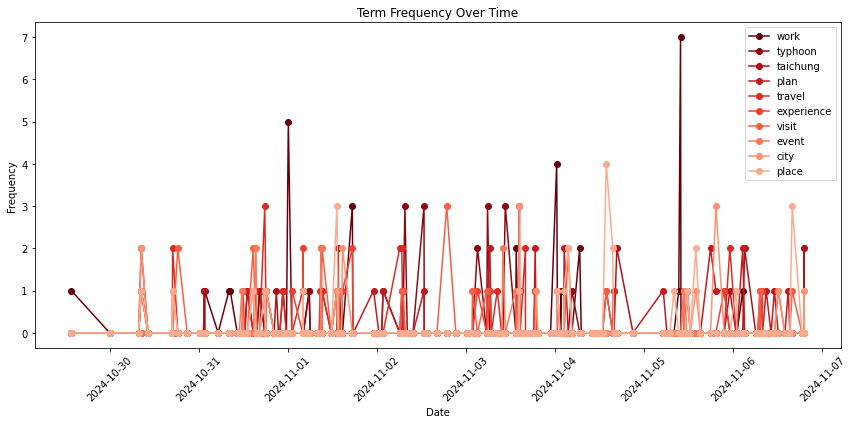

In [109]:
fig, ax = plot_word_timeseries_df_cat(taiwan_df, taiwan_top_terms[1:11])
#plt.savefig('test.png')
plt.show()

['country', 'leave']
['country', 'chinese']


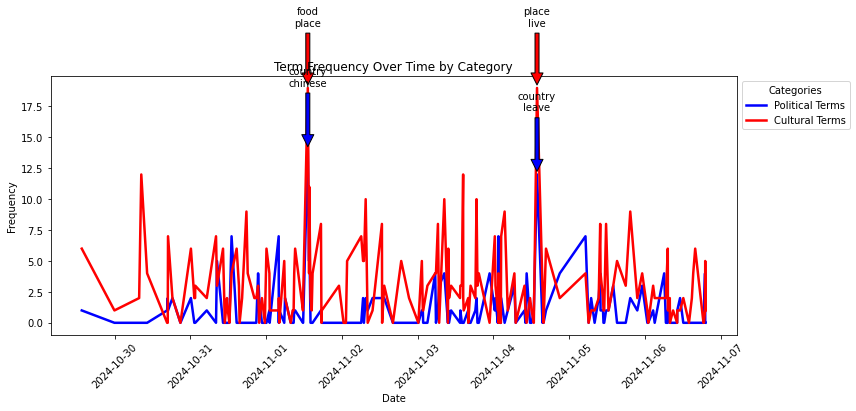

In [110]:
fig, ax = plot_word_timeseries_df_cat_grouped(taiwan_df, taiwan_top_terms[1:])
plt.show()

## Hong Kong

In [ ]:
#read csv
hong_kong_top_terms = pd.read_csv('/data/hongkong_top_terms.csv',sep=";")
#rename columns
hong_kong_top_terms.columns = ['term','category']
#category column to uppercase
hong_kong_top_terms['category'] = hong_kong_top_terms['category'].str.upper()
hong_kong_top_terms_full = hong_kong_top_terms
#only keep category != O
hong_kong_top_terms = hong_kong_top_terms[hong_kong_top_terms['category'] != 'O']

In [114]:
hong_kong_top_terms.head(10)

,term,category
12,place,C
45,market,C
46,recommendation,C
47,local,C
51,kowloon,C
59,visit,C
74,experience,C
108,country,P
111,hotel,C
116,chinese,P


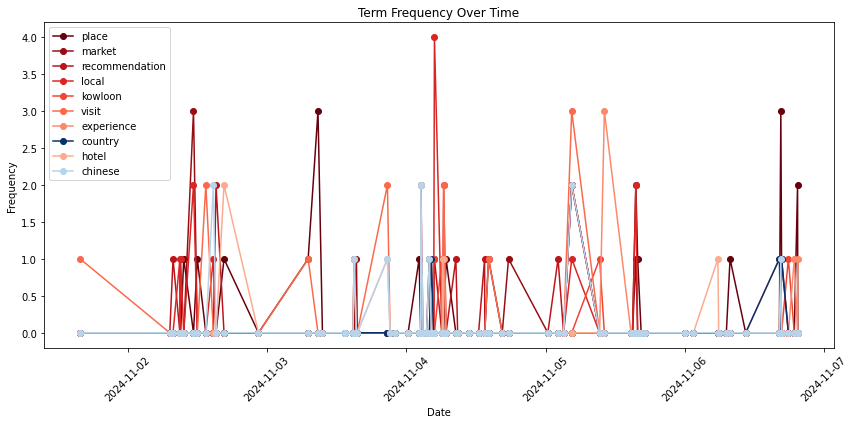

In [115]:
fig, ax = plot_word_timeseries_df_cat(hong_kong_df, hong_kong_top_terms[:10])
#plt.savefig('test.png')
plt.show()

['chinese', 'state']
['movie', 'chinese']


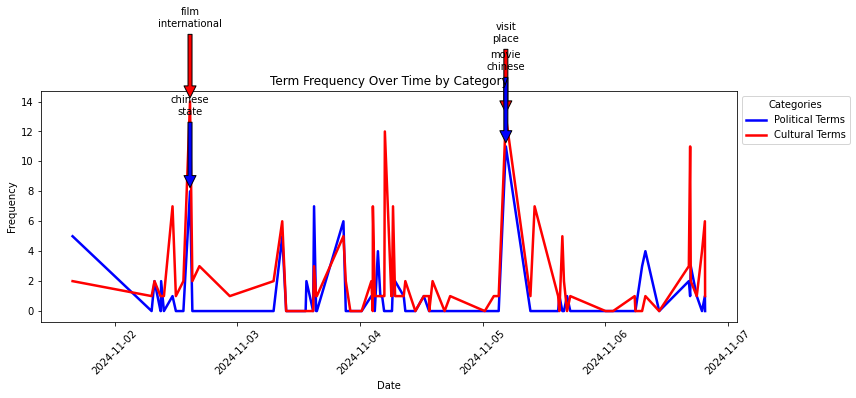

In [116]:
fig, ax = plot_word_timeseries_df_cat_grouped(hong_kong_df, hong_kong_top_terms)
plt.show()

In [301]:
plot_word_timeseries_df_cat_grouped_test(china_df, china_top_terms[1:])

# DISTANCE

In [117]:
tf_idf_scores_china.reset_index(inplace=True)
tf_idf_scores_taiwan.reset_index(inplace=True)
tf_idf_scores_hongkong.reset_index(inplace=True)

In [118]:
tf_idf_scores_china = tf_idf_scores_china.head(300)
tf_idf_scores_taiwan = tf_idf_scores_taiwan.head(300)
tf_idf_scores_hongkong = tf_idf_scores_hongkong.head(300)

In [119]:
tf_idf_scores_hongkong

,index,term,score
0,0,hong,0.059571
1,1,kong,0.059468
2,2,card,0.044647
3,3,get,0.043486
4,4,look,0.040630
...,...,...,...
295,295,support,0.005251
296,296,play,0.005245
297,297,macau,0.005218
298,298,jan,0.005187


In [120]:
#merge all 3 dataframes
hongkong_full = tf_idf_scores_hongkong.merge(hong_kong_top_terms_full, on='term', how='inner')
taiwan_full = tf_idf_scores_taiwan.merge(taiwan_top_terms_full, on='term', how='inner')
china_full = tf_idf_scores_china.merge(china_top_terms_full, on='term', how='inner')

In [121]:
taiwan_full

,index,term,score,category
0,0,taiwan,0.064155,O
1,1,taipei,0.036939,O
2,2,get,0.033039,O
3,3,know,0.031239,O
4,4,like,0.029774,O
...,...,...,...,...
295,295,fall,0.004726,O
296,296,better,0.004713,O
297,297,ago,0.004711,O
298,298,weekend,0.004704,O


In [122]:
#calculate point: sum of tfidf scores for each category
hongkong_point = hongkong_full.groupby('category')['score'].sum().reset_index()
taiwan_point = taiwan_full.groupby('category')['score'].sum().reset_index()
china_point = china_full.groupby('category')['score'].sum().reset_index()

In [ ]:
hongkong_C = float(hongkong_point[hongkong_point['category'] == 'C']['score'])
hongkong_P = float(hongkong_point[hongkong_point['category'] == 'P']['score'])
hongkong_O = float(hongkong_point[hongkong_point['category'] == 'O']['score'])
hongkong_total = hongkong_C + hongkong_P + hongkong_O
hongkong_C_normalized = hongkong_C/hongkong_total
hongkong_P_normalized = hongkong_P/hongkong_total
hongkong_O_normalized = hongkong_O/hongkong_total

taiwan_C = float(taiwan_point[taiwan_point['category'] == 'C']['score'])
taiwan_P = float(taiwan_point[taiwan_point['category'] == 'P']['score'])
taiwan_O = float(taiwan_point[taiwan_point['category'] == 'O']['score'])
taiwan_total = taiwan_C + taiwan_P + taiwan_O
taiwan_C_normalized = taiwan_C/taiwan_total
taiwan_P_normalized = taiwan_P/taiwan_total
taiwan_O_normalized = taiwan_O/taiwan_total

china_C = float(china_point[china_point['category'] == 'C']['score'])
china_P = float(china_point[china_point['category'] == 'P']['score'])
china_O = float(china_point[china_point['category'] == 'O']['score'])
china_total = china_C + china_P + china_O
china_C_normalized = china_C/china_total
china_P_normalized = china_P/china_total
china_O_normalized = china_O/china_total

Distance between Hong Kong and Taiwan: 0.02
Distance between China and Hong Kong: 0.09
Distance between China and Taiwan: 0.07

Angles between subreddit vectors:
Hong Kong vs Taiwan: 1.0°
China vs Hong Kong: 4.3°
China vs Taiwan: 3.3°


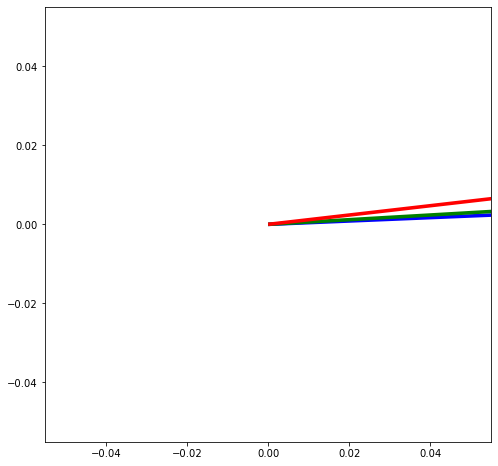

In [339]:
#Normalized
hongkong_np_normalized = hongkong_C_normalized+hongkong_O_normalized
taiwan_np_normalized = taiwan_C_normalized+taiwan_O_normalized
china_np_normalized = china_C_normalized+china_O_normalized
vectors = {
    'Hong Kong': np.array([hongkong_np_normalized, hongkong_P_normalized]),
    'Taiwan': np.array([taiwan_np_normalized, taiwan_P_normalized]),
    'China': np.array([china_np_normalized, china_P_normalized])
}

plot_subreddit_term_space(vectors, 'Non-Political', 'Political')
report_distances(vectors)

Distance between Hong Kong and Taiwan: 0.09
Distance between China and Hong Kong: 0.20
Distance between China and Taiwan: 0.11

Angles between subreddit vectors:
Hong Kong vs Taiwan: 4.4°
China vs Hong Kong: 10.5°
China vs Taiwan: 6.2°


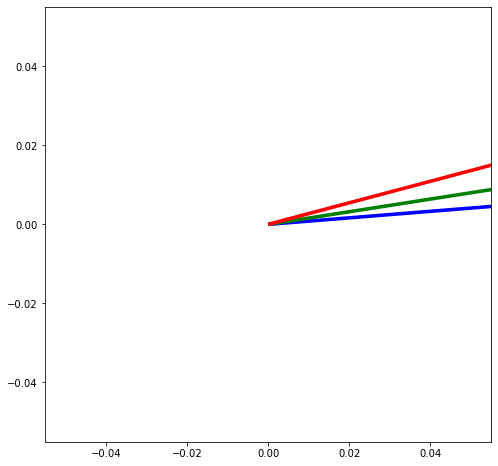

In [343]:
#Normalized

hongkong_nc_normalized = hongkong_O_normalized+hongkong_P_normalized
taiwan_nc_normalized = taiwan_O_normalized+taiwan_P_normalized
china_nc_normalized = china_O_normalized+china_P_normalized

vectors = {
    'Hong Kong': np.array([hongkong_nc_normalized, hongkong_C_normalized]),
    'Taiwan': np.array([taiwan_nc_normalized, taiwan_C_normalized]),
    'China': np.array([china_nc_normalized, china_C_normalized])
}

plot_subreddit_term_space(vectors, 'Non-Cultural', 'Cultural')
report_distances(vectors)

# K-MEANS CLUSTERING